Step 06: this file contains cross-correlation matrix and heatmaps of features of EEG single channel and subject data. The features are without artifacts which are removed by visualization of mean feature of each frequency band.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
df = pd.read_csv('./features_csv_feat11/EEG01_00.csv') # reading features without RBD patient

In [3]:
df.head()

flag  alpha_std  alpha_energy  alpha_mean  alpha_variance  alpha_skewness  \
0     0   4.255535   54328.75264    0.001756       18.109581       -0.001103   
1     0   4.305560   55613.55518   -0.002027       18.537848        0.001301   
2     0   3.478244   36294.55409    0.000578       12.098184       -0.000494   
3     0   4.324079   56093.14615   -0.007585       18.697658       -0.005248   
4     0  13.811972  572311.71830    0.001424      190.770571       -0.000300   

   alpha_Kurtosis  theta_std  theta_energy  theta_mean  ...  \
0       -0.007656   4.880030   71444.15972    0.004904  ...   
1        0.312765   4.872064   71211.04355   -0.002998  ...   
2        0.299030   3.431812   35332.09331    0.005538  ...   
3        0.349342   4.270850   54720.48734   -0.002020  ...   
4        5.492199   5.451224   89147.55919    0.003858  ...   

   delta_relative_power  alpha_mobility  alpha_complexity  alpha_entropy  \
0              0.702445        0.643598          1.029440       5.197639   
1              0.771164        0.653501          1.029798       5.242967   
2              0.808844        0.653323          1.032629       5.141308   
3              0.788614        0.654439          1.027019       5.610178   
4              0.449147        0.665892          1.028355       5.132853   

   theta_mobility  theta_complexity  theta_entropy  delta_mobility  \
0        0.368976          1.073406       5.057941        0.125467   
1        0.360120          1.084681       5.008672        0.112932   
2        0.378076          1.073266       5.238111        0.095567   
3        0.360884          1.083648       5.260737        0.107629   
4        0.375919          1.087701       5.040102        0.100073   

   delta_complexity  delta_entropy  
0          1.399665       4.686027  
1          1.484439       4.784436  
2          1.620877       4.961914  
3          1.540559       4.936872  
4          1.563462       4.823792  

[5 rows x 34 columns]

In [4]:
df_ex = df[df['flag'] == 0] # excluding flag == 1 values or artifacts

In [5]:
df_feat = df_ex.drop(['flag', 'alpha_mean', 'theta_mean', 'delta_mean'], axis=1) # droping irrelevant features
print('the shape of data after exclusing artifacts and irrelevant features: {}' .format(df_feat.shape))

the shape of data after exclusing artifacts and irrelevant features: (952, 30)


In [6]:
df_feat[['alpha_std', 'alpha_energy', 'alpha_variance','alpha_skewness', 'alpha_Kurtosis', 
        'alpha_mobility', 'alpha_complexity', 'alpha_entropy']].head()

alpha_std  alpha_energy  alpha_variance  alpha_skewness  alpha_Kurtosis  \
0   4.255535   54328.75264       18.109581       -0.001103       -0.007656   
1   4.305560   55613.55518       18.537848        0.001301        0.312765   
2   3.478244   36294.55409       12.098184       -0.000494        0.299030   
3   4.324079   56093.14615       18.697658       -0.005248        0.349342   
4  13.811972  572311.71830      190.770571       -0.000300        5.492199   

   alpha_mobility  alpha_complexity  alpha_entropy  
0        0.643598          1.029440       5.197639  
1        0.653501          1.029798       5.242967  
2        0.653323          1.032629       5.141308  
3        0.654439          1.027019       5.610178  
4        0.665892          1.028355       5.132853

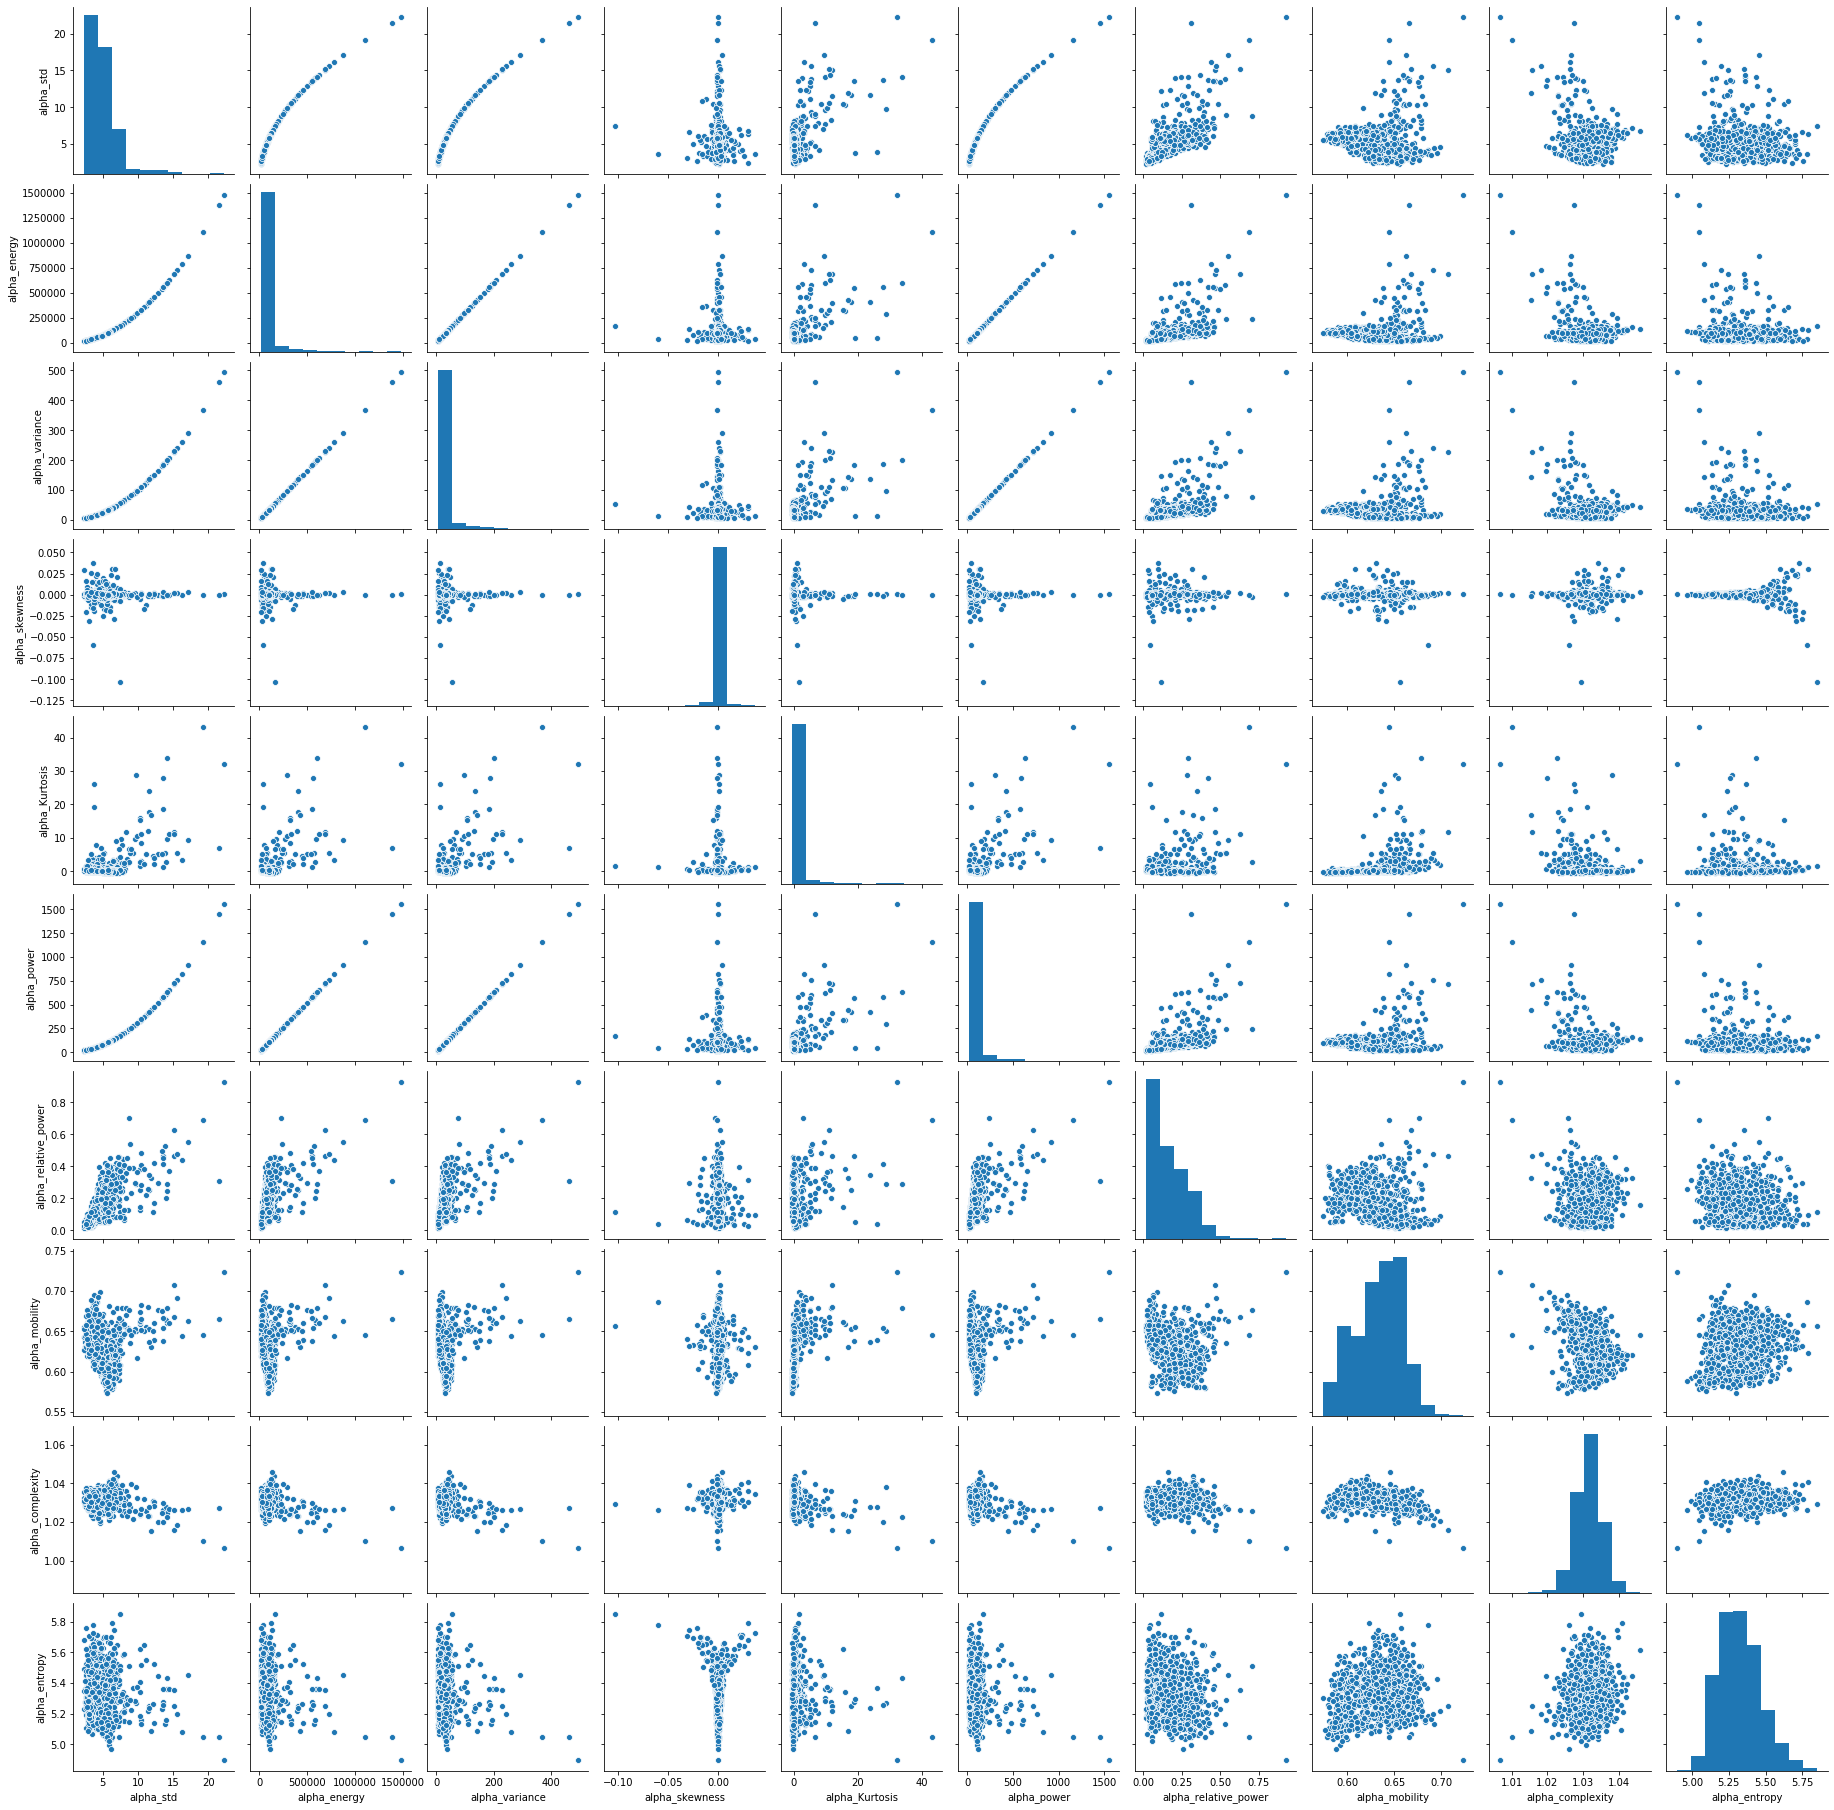

In [7]:
sns.pairplot(df_feat[['alpha_std', 'alpha_energy', 'alpha_variance','alpha_skewness', 'alpha_Kurtosis', 
            'alpha_power', 'alpha_relative_power', 'alpha_mobility', 'alpha_complexity', 'alpha_entropy']])
                                                                                                                         

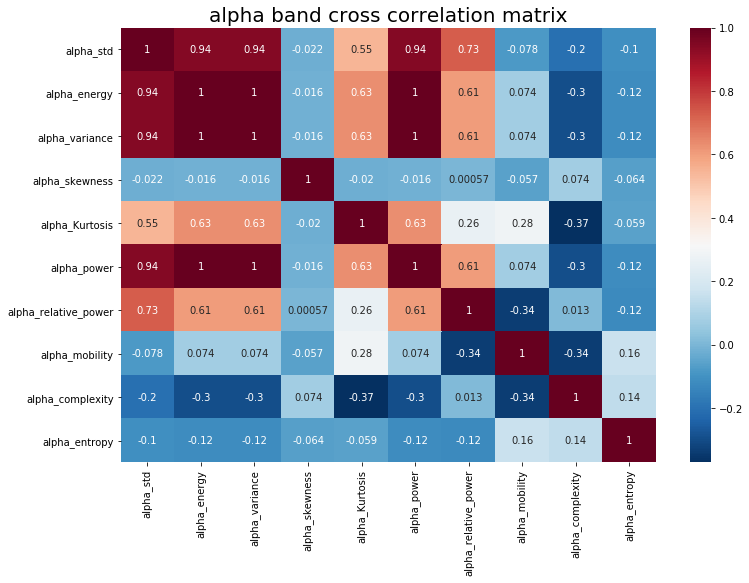

In [8]:
plt.subplots(figsize=(12,8))
plt.title('alpha band cross correlation matrix', fontsize=20)
corr = df_feat[['alpha_std', 'alpha_energy', 'alpha_variance','alpha_skewness', 'alpha_Kurtosis', 
        'alpha_power', 'alpha_relative_power', 'alpha_mobility', 'alpha_complexity', 'alpha_entropy']].corr()
sns.heatmap(corr, annot=True, cmap = "RdBu_r")
plt.show()

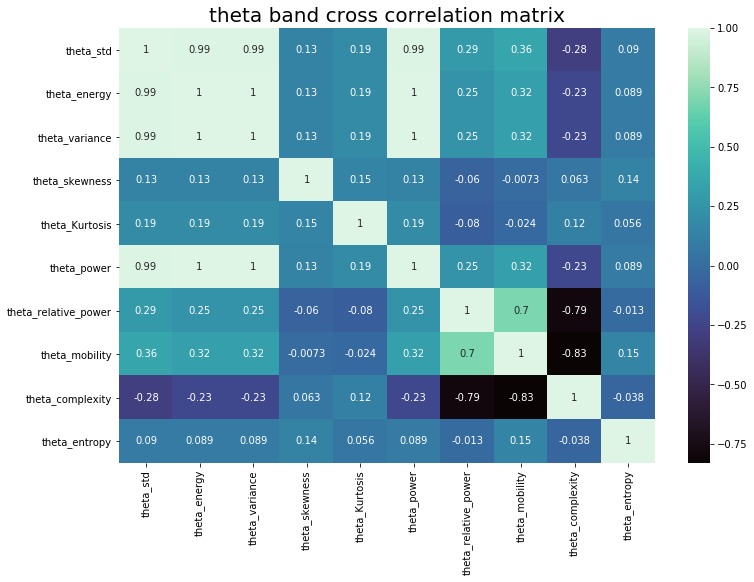

In [9]:
plt.subplots(figsize=(12,8))
plt.title('theta band cross correlation matrix', fontsize=20)
corr = df_feat[['theta_std', 'theta_energy', 'theta_variance', 'theta_skewness', 'theta_Kurtosis', 
                'theta_power', 'theta_relative_power', 'theta_mobility', 'theta_complexity', 'theta_entropy' ]].corr()
sns.heatmap(corr, annot=True, cmap = "mako")

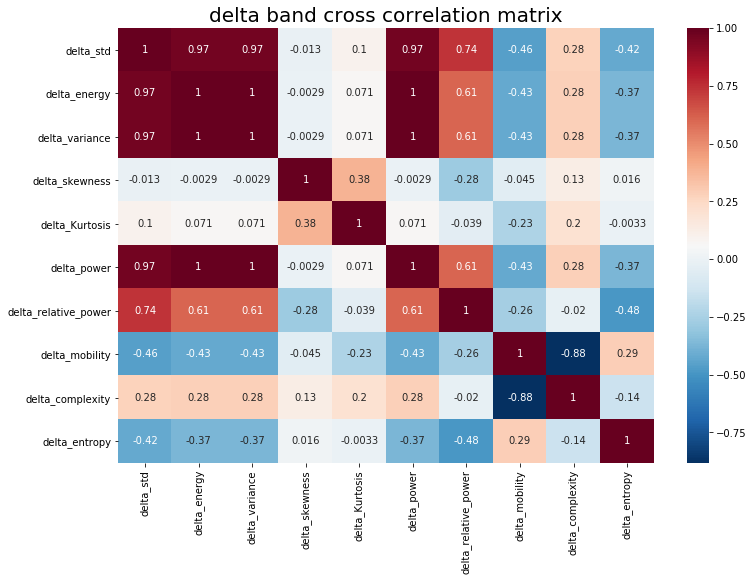

In [10]:
plt.subplots(figsize=(12,8))
plt.title('delta band cross correlation matrix', fontsize=20)
corr = df_feat[['delta_std', 'delta_energy', 'delta_variance', 'delta_skewness', 'delta_Kurtosis',
               'delta_power', 'delta_relative_power', 'delta_mobility', 'delta_complexity', 'delta_entropy']].corr()
sns.heatmap(corr, annot=True, cmap = "RdBu_r")

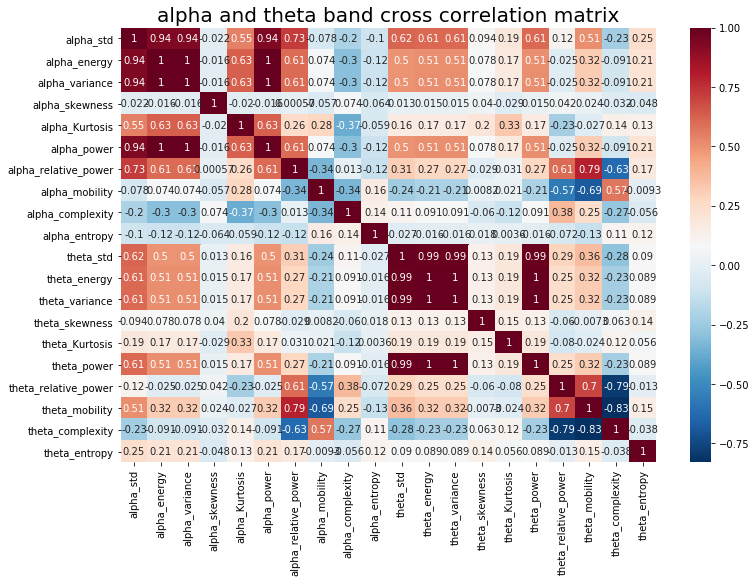

In [11]:
plt.subplots(figsize=(12,8))
plt.title('alpha and theta band cross correlation matrix', fontsize=20)

corr = df_feat[['alpha_std', 'alpha_energy', 'alpha_variance','alpha_skewness', 'alpha_Kurtosis', 
        'alpha_power', 'alpha_relative_power', 'alpha_mobility', 'alpha_complexity', 'alpha_entropy',
        'theta_std', 'theta_energy', 'theta_variance', 'theta_skewness', 'theta_Kurtosis', 
        'theta_power', 'theta_relative_power', 'theta_mobility', 'theta_complexity', 'theta_entropy']].corr()

sns.heatmap(corr, annot=True, cmap = "RdBu_r")
plt.show()

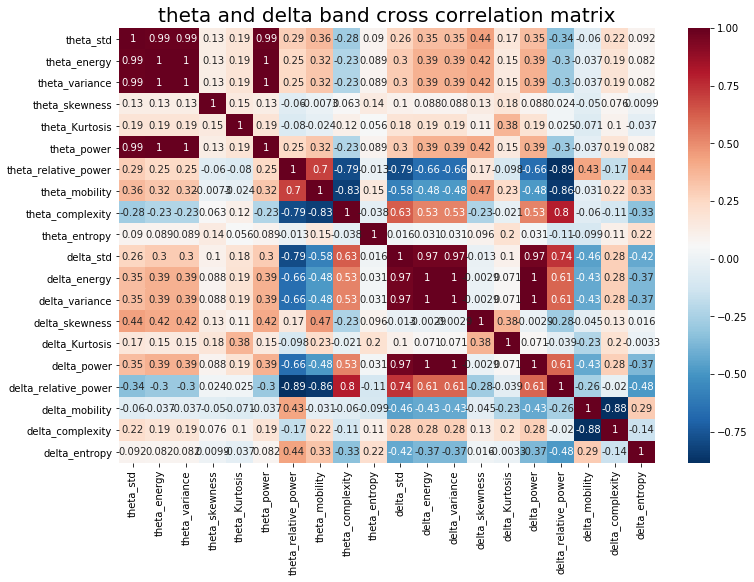

In [12]:
plt.subplots(figsize=(12,8))
plt.title('theta and delta band cross correlation matrix', fontsize=20)

corr = df_feat[['theta_std', 'theta_energy', 'theta_variance', 'theta_skewness', 'theta_Kurtosis', 
        'theta_power', 'theta_relative_power', 'theta_mobility', 'theta_complexity', 'theta_entropy',
        'delta_std', 'delta_energy', 'delta_variance', 'delta_skewness', 'delta_Kurtosis',
        'delta_power', 'delta_relative_power', 'delta_mobility', 'delta_complexity', 'delta_entropy']].corr()

sns.heatmap(corr, annot=True, cmap = "RdBu_r")
plt.show()

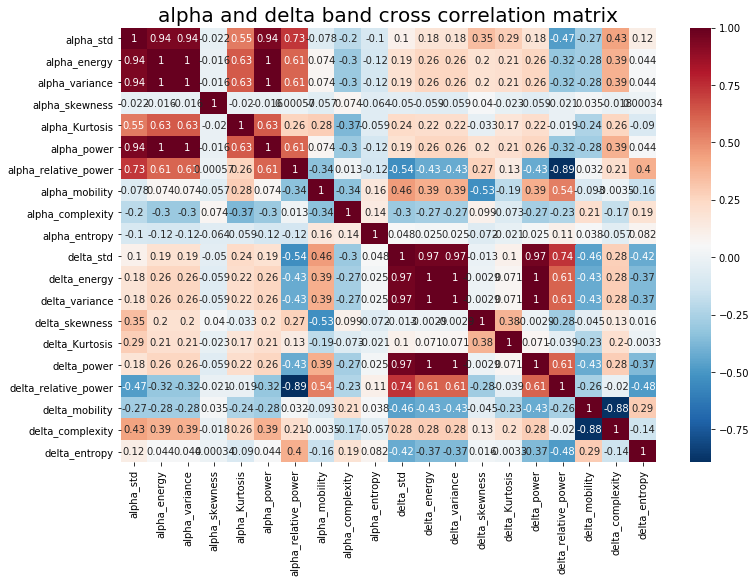

In [13]:
plt.subplots(figsize=(12,8))
plt.title('alpha and delta band cross correlation matrix', fontsize=20)

corr = df_feat[['alpha_std', 'alpha_energy', 'alpha_variance','alpha_skewness', 'alpha_Kurtosis', 
        'alpha_power', 'alpha_relative_power', 'alpha_mobility', 'alpha_complexity', 'alpha_entropy',
        'delta_std', 'delta_energy', 'delta_variance', 'delta_skewness', 'delta_Kurtosis',
        'delta_power', 'delta_relative_power', 'delta_mobility', 'delta_complexity', 'delta_entropy']].corr()

sns.heatmap(corr, annot=True, cmap = "RdBu_r")
plt.show()

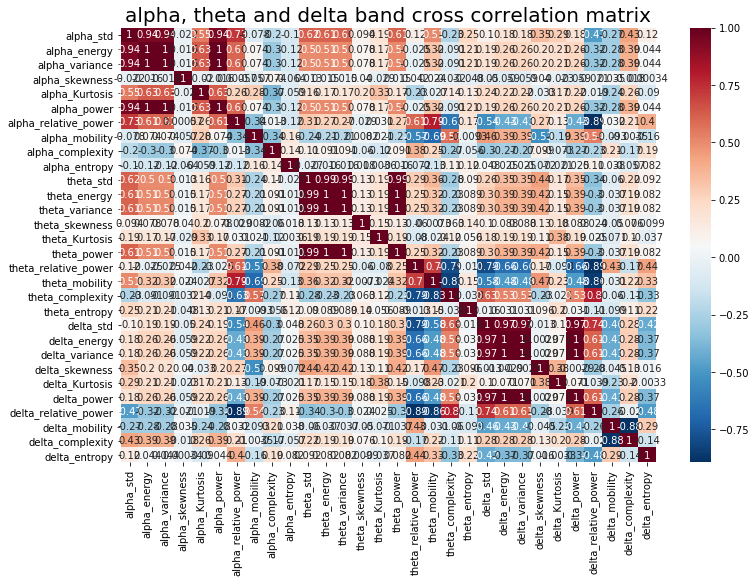

In [22]:
plt.subplots(figsize=(12,8))
plt.title('alpha, theta and delta band cross correlation matrix', fontsize=20)
corr = df_feat[['alpha_std', 'alpha_energy', 'alpha_variance','alpha_skewness', 'alpha_Kurtosis', 
                  'alpha_power', 'alpha_relative_power', 'alpha_mobility', 'alpha_complexity', 'alpha_entropy',
                'theta_std', 'theta_energy', 'theta_variance', 'theta_skewness', 'theta_Kurtosis', 
                'theta_power', 'theta_relative_power', 'theta_mobility', 'theta_complexity', 'theta_entropy',
               'delta_std', 'delta_energy', 'delta_variance', 'delta_skewness', 'delta_Kurtosis',
               'delta_power', 'delta_relative_power', 'delta_mobility', 'delta_complexity', 'delta_entropy']].corr()
sns.heatmap(corr, annot=True, cmap = "RdBu_r")

In [15]:
# normalization between -1 to 1
df_norm = pd.DataFrame()
for i in df_feat:
    df_norm[i] = df_feat[i]/np.max(np.abs(df_feat[i]))

df_norm.shape

(952, 30)

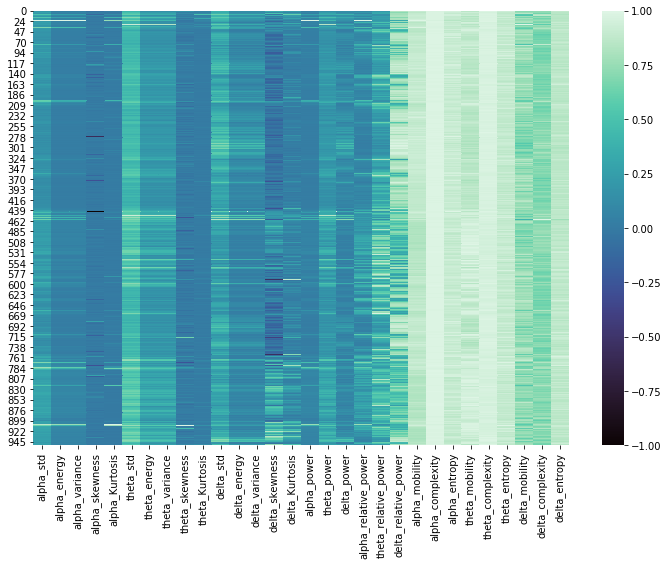

In [16]:
plt.subplots(figsize=(12,8))
sns.heatmap(df_norm, cmap = "mako")

C:\Users\Shahzeb\anaconda3\lib\site-packages\seaborn\matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


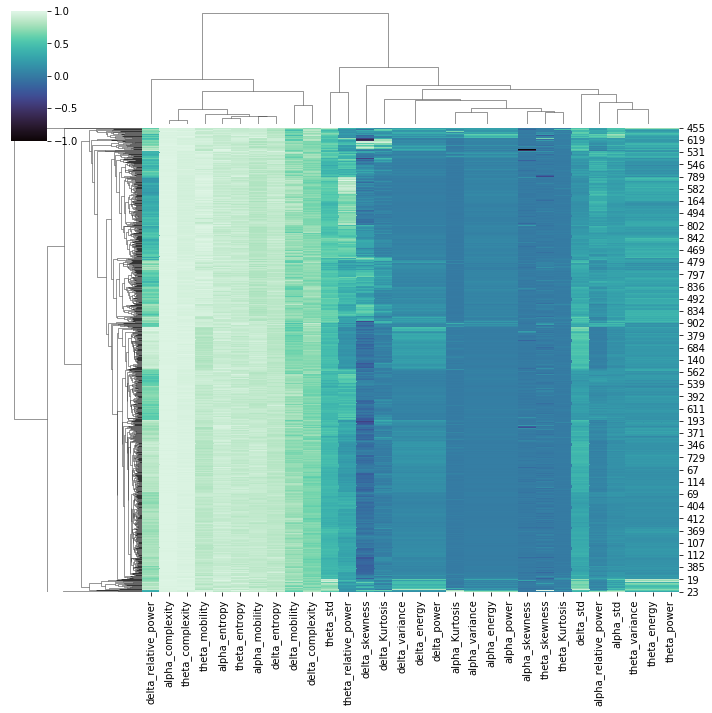

In [17]:
sns.clustermap(df_norm, cmap = "mako")